# Daten herunterladen:

https://drive.google.com/open?id=1kCYv7qOFqk_hldi7rKaBkZovVTyndVfP oder

https://shop.swisstopo.admin.ch/de/products/landscape/names3D

swissNAMES3D_LV95

shp_LV95_LN02

Benötigte Dateien:

swissNAMES3D_PKT.dbf

swissNAMES3D_PKT.prj

swissNAMES3D_PKT.shp

swissNAMES3D_PKT.shx

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import re

In [2]:
# Daten einlesen
gdf = gpd.read_file('shp_LV95_LN02/swissNAMES3D_PKT.shx')


In [3]:
gdf.head(2)

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
0,{2FF7E3F1-6BAA-4981-A172-A459E01982E8},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694037.021 1273364.505 389.545)
1,{AA4D0B0F-CA43-4B91-BFC3-32B9F3E2FEDB},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694225.446 1272960.581 386.701)


In [4]:
gdf.shape

(308200, 12)

In [5]:
gdf['OBJEKTART'].unique()

array(['Ausfahrt', 'Verzweigung', 'Ein- und Ausfahrt', 'Zollamt 24h 24h',
       'Zollamt 24h eingeschraenkt', 'Zollamt eingeschraenkt',
       'Verladestation', 'Haltestelle Schiff', 'Haltestelle Bahn',
       'Uebrige Bahnen', 'Haltestelle Bus', 'Flurname swisstopo',
       'Lokalname swisstopo', 'Pass', 'Gipfel', 'Hauptgipfel',
       'Alpiner Gipfel', 'Huegel', 'Haupthuegel', 'Felskopf',
       'Strassenpass', 'Quelle', 'Grotte, Hoehle', 'Wasserfall',
       'Denkmal', 'Brunnen', 'Bildstock', 'Aussichtspunkt',
       'Landesgrenzstein', 'Erratischer Block', 'Felsblock', 'Gebaeude',
       'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle', 'Turm'],
      dtype=object)

In [6]:
#gdf['OBJEKTKLAS'].unique()

In [7]:
#gdf['GEBAEUDENU'].unique()                 ## k_W  = kein Wert

In [8]:
## 123 Enträge in allen Sprachen
#gdf[gdf['OBJEKTART'] == 'Sakrales Gebaeude']

# Daten eingrenzen  
Spalten, Spache Hochdeutsch

In [23]:
## Nur benötigte Spalten
gdf_4spaltig = gdf[['OBJEKTART', 'NAME', 'SPRACHCODE', 'geometry']]

## Spalte Sprachcode als Index
gdf_4spaltig.set_index('SPRACHCODE', inplace=True)

gdf_4spaltig.shape

(308200, 3)

In [24]:
## Nur Zeilen Hochdeutsch
gdf_Hochdeutsch = gdf_4spaltig.loc['Hochdeutsch inkl. Lokalsprachen']

In [25]:
gdf_Hochdeutsch.shape

(206580, 3)

In [26]:
gdf_4spaltig['OBJEKTART'].unique()

array(['Ausfahrt', 'Verzweigung', 'Ein- und Ausfahrt', 'Zollamt 24h 24h',
       'Zollamt 24h eingeschraenkt', 'Zollamt eingeschraenkt',
       'Verladestation', 'Haltestelle Schiff', 'Haltestelle Bahn',
       'Uebrige Bahnen', 'Haltestelle Bus', 'Flurname swisstopo',
       'Lokalname swisstopo', 'Pass', 'Gipfel', 'Hauptgipfel',
       'Alpiner Gipfel', 'Huegel', 'Haupthuegel', 'Felskopf',
       'Strassenpass', 'Quelle', 'Grotte, Hoehle', 'Wasserfall',
       'Denkmal', 'Brunnen', 'Bildstock', 'Aussichtspunkt',
       'Landesgrenzstein', 'Erratischer Block', 'Felsblock', 'Gebaeude',
       'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle', 'Turm'],
      dtype=object)

In [27]:
## Spalte OBJEKTART als Index
gdf_Hochdeutsch.set_index('OBJEKTART', inplace=True)

In [28]:
gdf_3spaltig = gdf_Hochdeutsch.copy()

In [29]:
gdf_3spaltig.head(10)

,NAME,geometry
OBJEKTART,,
Ausfahrt,Kleinandelfingen,POINT Z (2694037.021 1273364.505 389.545)
Ausfahrt,Kleinandelfingen,POINT Z (2694225.446 1272960.581 386.701)
Ausfahrt,Winterthur-Töss,POINT Z (2695211.064 1260578.998 436.378)
Ausfahrt,Wülflingen,POINT Z (2694252.651 1263268.638 412.791)
Ausfahrt,Wülflingen,POINT Z (2694494.016 1263591.783 427.094)
Verzweigung,Winterthur-Nord,POINT Z (2694852.543 1264108.073 438.363)
Verzweigung,Winterthur-Nord,POINT Z (2695091.488 1264580.048 432.101)
Verzweigung,Winterthur-Nord,POINT Z (2695409.576 1264572.464 442.853)
Ausfahrt,Winterthur-Ohringen,POINT Z (2695995.191 1264426.583 458.974)


In [30]:
gdf_3spaltig.shape

(206580, 2)

In [31]:
#gdf_3spaltig.loc['Gebaeude']  ## nur ein begriff möglich


In [32]:
## Objekte, die uns interessieren
objekte = ['Gebaeude', 'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle']
#objekte = ['Sakrales Gebaeude', 'Kapelle']

gdf_heilige1 = gdf_3spaltig[gdf_3spaltig.index.isin(objekte)]
gdf_heilige1.shape

(4471, 2)

In [33]:
## Objekte, die uns interessieren
#objekte = ['Gebaeude', 'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle']
objekte = ['Sakrales Gebaeude', 'Kapelle']

gdf_heilige2 = gdf_3spaltig[gdf_3spaltig.index.isin(objekte)]
gdf_heilige2.shape

(143, 2)

In [36]:
gdf_heilige1[gdf_heilige1['NAME'].str.contains("St. ")]

,NAME,geometry
OBJEKTART,,
Kapelle,St. Karl,POINT Z (2681341.477 1223234.045 424.672)
Gebaeude,Restaurant St. Meinrad,POINT Z (2701102.928 1225561.940 963.080)
Gebaeude,Knutwil St. Erhard 300m,POINT Z (2647760.271 1227126.675 566.327)
Kapelle,St. Benedikt,POINT Z (2700050.226 1220653.760 921.988)
Kapelle,St. Niklaus,POINT Z (2670666.097 1154915.539 1472.405)
Kapelle,St. Niklaus,POINT Z (2733900.373 1166113.570 1263.254)
Sakrales Gebaeude,St. Joseph,POINT Z (2715809.727 1232179.387 441.121)
Kapelle,St. Wendelinskapelle,POINT Z (2658519.521 1229365.521 725.645)
Kapelle,St. Johann,POINT Z (2706321.463 1226955.446 501.443)


In [50]:
#gdf_heilige1[gdf_heilige1['NAME'].str.contains("Kloster")]

In [ ]:
## In Spalte suchen

# str.find()

# Plotting

In [51]:
sankt = gdf[gdf['NAME'].str.contains("St. ")]

In [60]:
len(sankt)

645

In [52]:
gdf_kantone = gpd.read_file('Projections/shp/g1k17.shp')

In [53]:
gdf_kantone['KTNAME'].unique()

array(['Zürich', 'Bern / Berne', 'Luzern', 'Uri', 'Schwyz', 'Obwalden',
       'Nidwalden', 'Glarus', 'Zug', 'Fribourg / Freiburg', 'Solothurn',
       'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen',
       'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen',
       'Graubünden / Grigioni / Grischun', 'Aargau', 'Thurgau', 'Ticino',
       'Vaud', 'Valais / Wallis', 'Neuchâtel', 'Genève', 'Jura'],
      dtype=object)

In [58]:
#gdf_heilige1 = gdf_heilige1.to_crs({'init': 'epsg:21781'})
#gdf = gdf.to_crs({'init': 'epsg:21781'})
sankt = sankt.to_crs({'init': 'epsg:21781'})


/home/pc/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


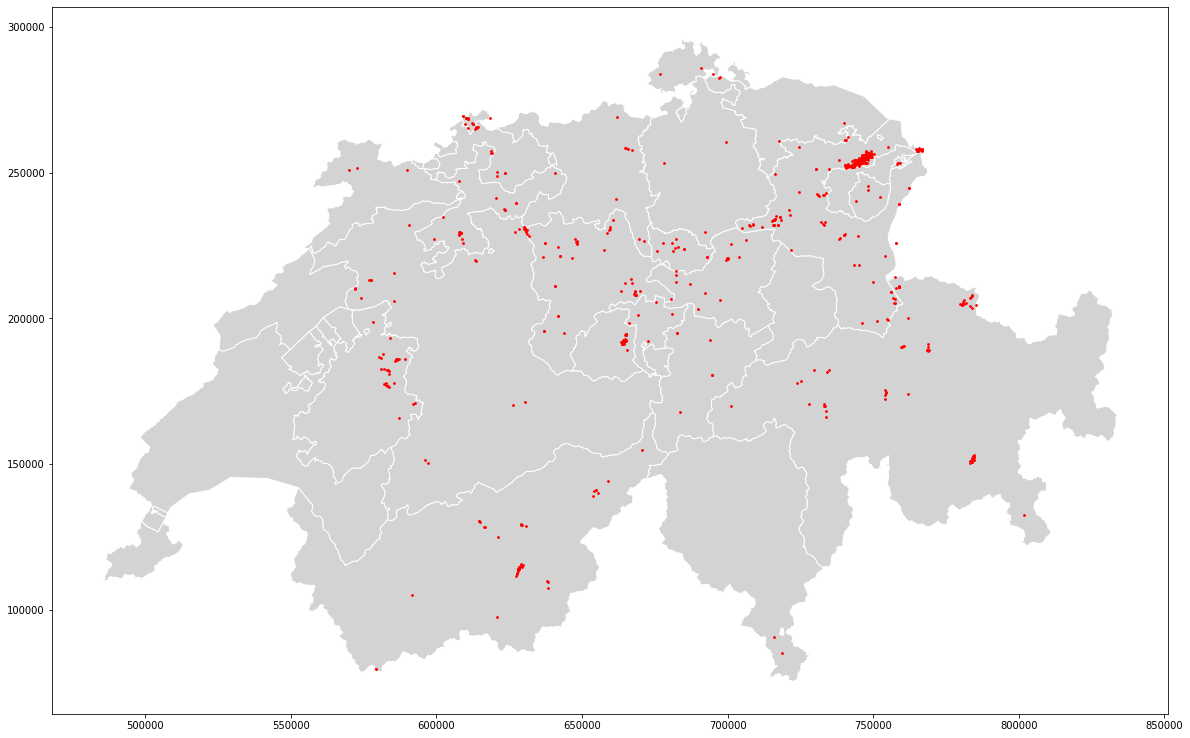

In [61]:
ax = gdf_kantone.plot(figsize=(20,15), color='lightgrey', edgecolor='white')
sankt.plot(markersize=3, color='red', ax=ax)

# Ortstypen farbig unterscheiden

In [ ]:
colors = {
    'retail': 'blue',
    'pronto': 'green',
    'id': 'orange',
    'restaurant': 'red',
    'impo': 'darkblue',
    'vitality': 'darkgreen',
    'bh': 'black',
    'christ': 'black',
    'city': 'black',
    'livique': 'black',
    'togo': 'black',
    'lumimart': 'black',
    'takeit': 'black',
    'marche': 'black',
    'hotel': 'black',
    'capuccini': 'black',
    'burger': 'black',
    'toptip': 'black',
    'cindy': 'black',
    'sapori': 'black',
    'zopf': 'black',
    'karma': 'black',
    'halba': 'black',
    'perpiedi': 'black'
}

In [ ]:
colorlist = gdf_stores['typ'].apply(lambda typ: colors[typ])

In [ ]:
colorlist.value_counts(dropna=False)

# Punkte auf Karte Kanton Zürich

In [43]:
gdf_zh = gdf_kantone[gdf_kantone['KTNAME'] == 'Zürich']

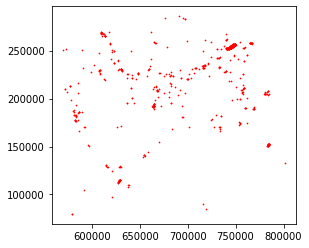

In [68]:
sankt.plot(color='red', markersize=0.5)

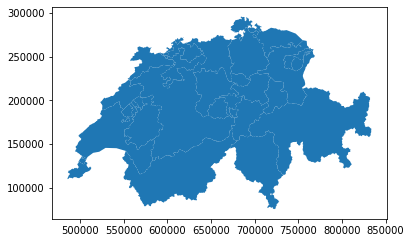

In [63]:
gdf_kantone.plot()

In [64]:
#gdf_merged = gpd.sjoin(gdf_heilige1, gdf_kantone, how='left', op='within')
gdf_merged = gpd.sjoin(sankt, gdf_kantone, how='left', op='within')


In [65]:
gdf_merged.columns

Index(['UUID', 'OBJEKTART', 'OBJEKTKLAS', 'HOEHE', 'GEBAEUDENU', 'NAME_UUID',
       'NAME', 'STATUS', 'SPRACHCODE', 'NAMEN_TYP', 'NAMENGRUPP', 'geometry',
       'index_right', 'KTNR', 'KTNAME', 'GRNR', 'AREA_HA', 'X_MIN', 'X_MAX',
       'Y_MIN', 'Y_MAX', 'X_CNTR', 'Y_CNTR', 'Z_MIN', 'Z_MAX', 'Z_AVG',
       'Z_MED', 'E_MIN', 'E_MAX', 'N_MIN', 'N_MAX', 'E_CNTR', 'N_CNTR'],
      dtype='object')

In [66]:
#gdf_merged.plot(figsize=(10,12))

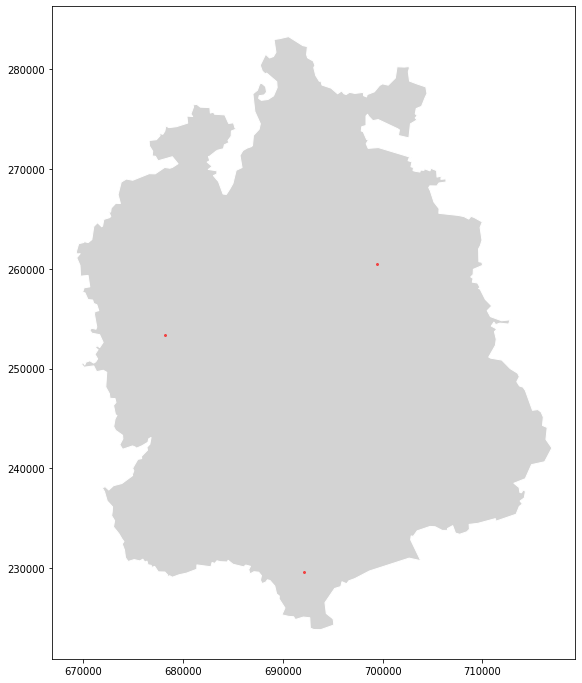

In [67]:
ax = gdf_kantone[gdf_kantone['KTNAME'] == 'Zürich'].plot(color='lightgrey', edgecolor='white', figsize=(10,12))
gdf_merged[gdf_merged['KTNAME'] == 'Zürich'].plot(markersize=4, color='red', alpha=0.6, ax=ax)

In [ ]:
#####zuerich = gdf_heilige1.unary_union

In [ ]:
#zuerich = gdf_zh.contains(gdf_heilige1)

In [ ]:
zuerich = gdf_heilige1.within(gdf_zh)

In [ ]:
#zuerich

In [ ]:
#gdf_zh[gdf_zh.contains(zuerich)].plot(ax=ax, color='darkblue', alpha=0.4)

In [ ]:
#zuerich.within(gdf_zh)


In [ ]:
ax = gdf_kantone[gdf_kantone['KTNAME'] == 'Zürich'].plot(color='lightgrey', edgecolor='white', figsize=(10,12))
zuerich.plot(markersize=0.5, ax=ax)

In [ ]:
#zuerich = gdf_zh.contains(gdf_heilge1)
#gdf_zh.contains(gdf_heilige1).plot(markersize=3, ax=ax)


In [ ]:
#gdf_zh[gdf_zh.contains(zuerich)].plot(ax=ax, color='darkblue', alpha=0.4)

In [ ]:
tracts[tracts.disjoint(near_area)].plot(ax=ax, color='darkblue', alpha=0.4)

In [ ]:
polygon1.contains(punkt1)

In [ ]:
near_area = grocery_stores.buffer(500).unary_union

In [ ]:
# Spalte "time" als Index setzen
df.set_index('time', inplace=True)

In [ ]:
gdf_spaltenliste-loc[]



In [ ]:
df_m.loc[1909:1918]

erstezeile2 = df.loc['2014-10-13'][['ROCHE','NOVARTIS']]

df.sort_values('Approved Amount', ascending=False).head(50)['University'].value_counts()

df.groupby('Funding Instrument Hierarchy')['Approved Amount'].sum()





In [ ]:
## Daten abspeichern
xxxx.to_csv(path, index=False)
